In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [43]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [44]:
# date_time, maxtempC, mintempC, totalSnow_cm, sunHour, uvIndex, uvIndex, moon_illumination, moonrise, moonset, sunrise, sunset, DewPointC, FeelsLikeC, HeatIndexC, WindChillC, WindGustKmph, cloudcover, humidity, precipMM, pressure, tempC, visibility, winddirDegree, windspeedKmph

Combined Daily Weather Report

In [45]:
#Raw content URL for the dataset
url = "https://raw.githubusercontent.com/hastighsh/Ellehacks_2024/main/combined_data.csv"

#Specify the delimiter
delimiter = ','

#Read the data into a DataFrame
daily_weather_df = pd.read_csv(url, delimiter=delimiter)

#Let's create a backup copy of the dataset
daily_weather_df_backup = daily_weather_df.copy()

In [46]:
daily_weather_df

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,uvIndex,moon_illumination,moonrise,moonset,sunrise,...,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2014-06-30,30,22,0.0,10.0,6,16,08:49 AM,10:31 PM,05:34 AM,...,33,63,92,28.8,1006,30,7,198,16,Illinois
1,2014-07-01,26,18,0.0,15.0,6,23,09:46 AM,11:01 PM,05:34 AM,...,31,19,82,0.0,1007,26,10,265,17,Illinois
2,2014-07-02,18,14,0.0,5.0,4,30,10:42 AM,11:30 PM,05:35 AM,...,23,81,90,1.1,1015,18,7,297,13,Illinois
3,2014-06-09,27,16,0.0,9.0,5,81,03:27 PM,02:33 AM,05:38 AM,...,8,65,83,13.7,1012,27,8,197,3,Alberta
4,2014-06-03,23,16,0.0,8.0,4,35,10:30 AM,11:13 PM,05:37 AM,...,8,73,87,22.8,1009,23,8,127,3,Alberta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2008-11-11,32,17,0.0,11.0,5,93,04:18 PM,04:30 AM,06:18 AM,...,10,38,82,0.0,1012,32,5,81,5,Island%20of%20Puerto%20Rico
376,2008-11-07,22,10,0.0,11.0,5,62,01:55 PM,12:33 AM,06:45 AM,...,16,2,73,0.0,1013,22,10,220,9,Southern%20California
377,2008-09-22,30,23,0.0,8.0,6,39,12:32 AM,02:17 PM,07:04 AM,...,10,73,96,14.7,1012,30,9,107,4,Island%20of%20Puerto%20Rico
378,2008-08-16,33,24,0.0,11.0,6,100,07:40 PM,06:40 AM,06:58 AM,...,11,43,78,16.8,1012,33,8,76,5,Island%20of%20Puerto%20Rico


In [47]:
header_list = daily_weather_df.columns.tolist()
print(header_list)

['date_time', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'uvIndex', 'moon_illumination', 'moonrise', 'moonset', 'sunrise', 'sunset', 'DewPointC', 'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph', 'location']


In [48]:
daily_weather_df.drop(columns=['uvIndex', 'moon_illumination', 'moonrise', 'moonset', 'sunrise','sunset', 'DewPointC'], inplace=True)

In [49]:
header_list = daily_weather_df.columns.tolist()
print(header_list)
daily_weather_df

['date_time', 'maxtempC', 'mintempC', 'totalSnow_cm', 'sunHour', 'FeelsLikeC', 'HeatIndexC', 'WindChillC', 'WindGustKmph', 'cloudcover', 'humidity', 'precipMM', 'pressure', 'tempC', 'visibility', 'winddirDegree', 'windspeedKmph', 'location']


,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location
0,2014-06-30,30,22,0.0,10.0,29,29,26,33,63,92,28.8,1006,30,7,198,16,Illinois
1,2014-07-01,26,18,0.0,15.0,21,22,21,31,19,82,0.0,1007,26,10,265,17,Illinois
2,2014-07-02,18,14,0.0,5.0,16,16,16,23,81,90,1.1,1015,18,7,297,13,Illinois
3,2014-06-09,27,16,0.0,9.0,21,21,21,8,65,83,13.7,1012,27,8,197,3,Alberta
4,2014-06-03,23,16,0.0,8.0,20,20,20,8,73,87,22.8,1009,23,8,127,3,Alberta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2008-11-11,32,17,0.0,11.0,27,27,24,10,38,82,0.0,1012,32,5,81,5,Island%20of%20Puerto%20Rico
376,2008-11-07,22,10,0.0,11.0,16,16,16,16,2,73,0.0,1013,22,10,220,9,Southern%20California
377,2008-09-22,30,23,0.0,8.0,29,29,25,10,73,96,14.7,1012,30,9,107,4,Island%20of%20Puerto%20Rico
378,2008-08-16,33,24,0.0,11.0,33,33,28,11,43,78,16.8,1012,33,8,76,5,Island%20of%20Puerto%20Rico


Power Outage

In [53]:
#Raw content URL for adult-all.txt
url = "https://raw.githubusercontent.com/hastighsh/Ellehacks_2024/main/PowerOutageFinal.csv"

#Specify the delimiter (assuming it's a tab-separated file)
delimiter = ','

#Read the data into a DataFrame
power_outages_data = pd.read_csv(url, delimiter=delimiter)

#Let's create a backup copy of the dataset
outage_backup = power_outages_data.copy()

In [55]:
power_outages_data

,Date Event Began,Date of Restoration,Respondent,Geographic Areas,Tags,Time Event Began,Time of Restoration,Category,Sub Category
0,6/30/2014,7/2/2014,Exelon Corporation/ComEd,Illinois,"severe weather, thunderstorm",20:00:00,18:30:00,Severe Weather,Thunderstorms
1,4/12/2014,4/15/2014,Detroit Edison Company,Michigan,severe weather,20:00:00,19:30:00,Severe Weather,NaN
2,3/12/2014,3/13/2014,Duke Energy Carolinas,North Carolina,"severe weather, wind",19:35:00,12:00:00,Severe Weather,High Winds
3,2/12/2014,2/15/2014,Duke Energy Progress,North Carolina,"severe weather, winter storm",12:10:00,15:20:00,Severe Weather,Snow/Ice
4,2/5/2014,2/9/2014,FirstEnergy Corp: Met-Ed,Pennsylvania,"severe weather, winter storm",01:00:00,20:40:00,Severe Weather,Snow/Ice
5,2/5/2014,2/5/2014,Exelon Corporation/PECO,Pennsylvania,"severe weather, winter storm",05:00:00,05:01:00,Severe Weather,Snow/Ice
6,1/7/2014,1/8/2014,Duke Energy Progress,North Carolina,"severe weather, cold",16:15:00,13:20:00,Public Appeal due to Severe Weather,Cold
7,1/7/2014,1/7/2014,Duke Energy Progress,North Carolina,"severe weather, cold, public appeal",07:58:00,11:00:00,Voltage Reduction; Public Appeal due to Severe...,Cold
8,1/7/2014,1/7/2014,PJM Interconnection,Pennsylvania,"severe weather, cold",06:18:00,06:19:00,Severe Weather,Cold
9,1/6/2014,1/6/2014,"UGI Utilities, Inc",Pennsylvania,"severe weather, cold",19:50:00,20:49:00,Voltage Reduction due to Severe Weather,Cold


In [54]:
# power_outages_data.drop(["Unnamed: 0", "NERC Region", "Demand Loss (MW)", "Number of Customers Affected"], axis=1)

In [56]:
daily_weather_df['new_column'] = 1


In [59]:
daily_weather_df = daily_weather_df.rename(columns={'new_column': 'target'})
daily_weather_df

,date_time,maxtempC,mintempC,totalSnow_cm,sunHour,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,location,target
0,2014-06-30,30,22,0.0,10.0,29,29,26,33,63,92,28.8,1006,30,7,198,16,Illinois,1
1,2014-07-01,26,18,0.0,15.0,21,22,21,31,19,82,0.0,1007,26,10,265,17,Illinois,1
2,2014-07-02,18,14,0.0,5.0,16,16,16,23,81,90,1.1,1015,18,7,297,13,Illinois,1
3,2014-06-09,27,16,0.0,9.0,21,21,21,8,65,83,13.7,1012,27,8,197,3,Alberta,1
4,2014-06-03,23,16,0.0,8.0,20,20,20,8,73,87,22.8,1009,23,8,127,3,Alberta,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2008-11-11,32,17,0.0,11.0,27,27,24,10,38,82,0.0,1012,32,5,81,5,Island%20of%20Puerto%20Rico,1
376,2008-11-07,22,10,0.0,11.0,16,16,16,16,2,73,0.0,1013,22,10,220,9,Southern%20California,1
377,2008-09-22,30,23,0.0,8.0,29,29,25,10,73,96,14.7,1012,30,9,107,4,Island%20of%20Puerto%20Rico,1
378,2008-08-16,33,24,0.0,11.0,33,33,28,11,43,78,16.8,1012,33,8,76,5,Island%20of%20Puerto%20Rico,1


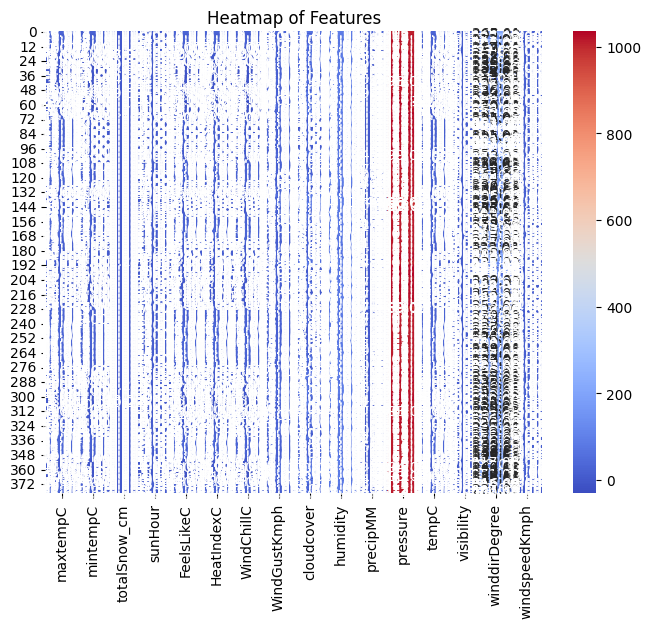

In [63]:
tempd = daily_weather_df.drop(columns=["date_time","location"])
labels = tempd['target']
features = tempd.drop('target', axis=1)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(features, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Features')
plt.show()

In [75]:
tempd

,maxtempC,mintempC,totalSnow_cm,sunHour,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,target
0,30,22,0.0,10.0,29,29,26,33,63,92,28.8,1006,30,7,198,16,1
1,26,18,0.0,15.0,21,22,21,31,19,82,0.0,1007,26,10,265,17,1
2,18,14,0.0,5.0,16,16,16,23,81,90,1.1,1015,18,7,297,13,1
3,27,16,0.0,9.0,21,21,21,8,65,83,13.7,1012,27,8,197,3,1
4,23,16,0.0,8.0,20,20,20,8,73,87,22.8,1009,23,8,127,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,32,17,0.0,11.0,27,27,24,10,38,82,0.0,1012,32,5,81,5,1
376,22,10,0.0,11.0,16,16,16,16,2,73,0.0,1013,22,10,220,9,1
377,30,23,0.0,8.0,29,29,25,10,73,96,14.7,1012,30,9,107,4,1
378,33,24,0.0,11.0,33,33,28,11,43,78,16.8,1012,33,8,76,5,1


In [84]:
df_normalized = (tempd - tempd.min()) / (tempd.max() - tempd.min())

In [85]:
df_normalized['target'] = 1
df_normalized

,maxtempC,mintempC,totalSnow_cm,sunHour,FeelsLikeC,HeatIndexC,WindChillC,WindGustKmph,cloudcover,humidity,precipMM,pressure,tempC,visibility,winddirDegree,windspeedKmph,target
0,0.870370,0.882353,0.0,0.600000,0.895522,0.875000,0.919355,0.388060,0.63,0.915663,0.276923,0.472727,0.870370,0.666667,0.545171,0.304348,1
1,0.796296,0.803922,0.0,0.933333,0.776119,0.750000,0.838710,0.358209,0.19,0.795181,0.000000,0.490909,0.796296,1.000000,0.753894,0.326087,1
2,0.648148,0.725490,0.0,0.266667,0.701493,0.642857,0.758065,0.238806,0.81,0.891566,0.010577,0.636364,0.648148,0.666667,0.853583,0.239130,1
3,0.814815,0.764706,0.0,0.533333,0.776119,0.732143,0.838710,0.014925,0.65,0.807229,0.131731,0.581818,0.814815,0.777778,0.542056,0.021739,1
4,0.740741,0.764706,0.0,0.466667,0.761194,0.714286,0.822581,0.014925,0.73,0.855422,0.219231,0.527273,0.740741,0.777778,0.323988,0.021739,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0.907407,0.784314,0.0,0.666667,0.865672,0.839286,0.887097,0.044776,0.38,0.795181,0.000000,0.581818,0.907407,0.444444,0.180685,0.065217,1
376,0.722222,0.647059,0.0,0.666667,0.701493,0.642857,0.758065,0.134328,0.02,0.686747,0.000000,0.600000,0.722222,1.000000,0.613707,0.152174,1
377,0.870370,0.901961,0.0,0.466667,0.895522,0.875000,0.903226,0.044776,0.73,0.963855,0.141346,0.581818,0.870370,0.888889,0.261682,0.043478,1
378,0.925926,0.921569,0.0,0.666667,0.955224,0.946429,0.951613,0.059701,0.43,0.746988,0.161538,0.581818,0.925926,0.777778,0.165109,0.065217,1


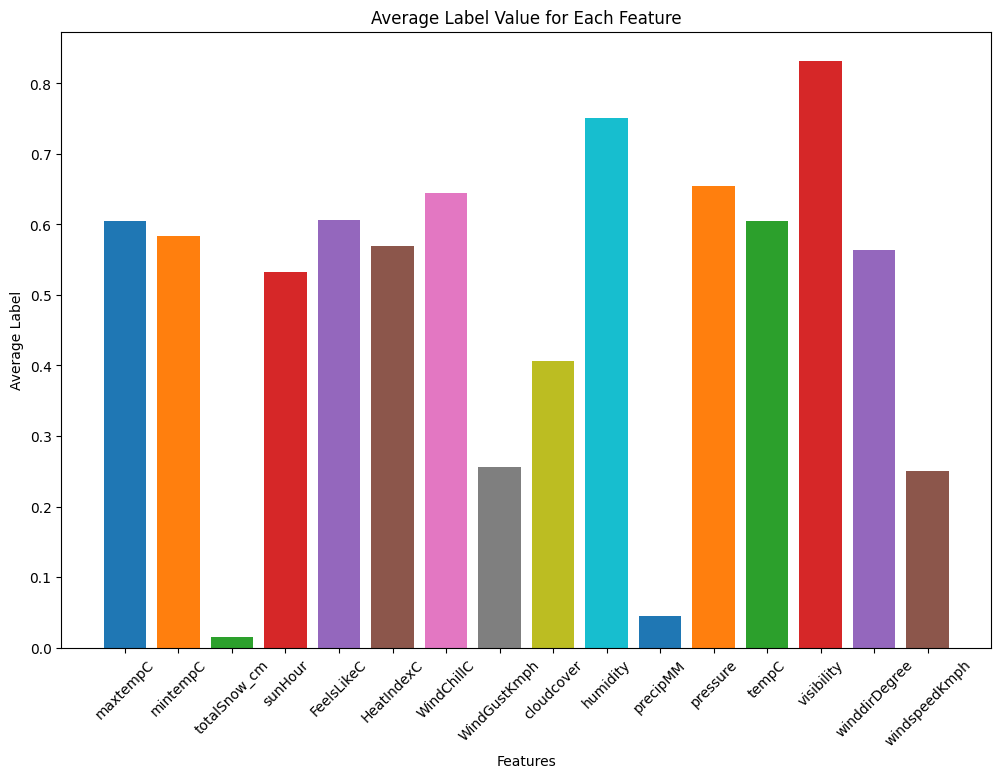

In [87]:
features = df_normalized.columns[:-1]  # Assuming last column is the label
average_labels = []

for feature in features:
    if pd.api.types.is_numeric_dtype(df_normalized[feature]):
        average_label = df_normalized.groupby('target')[feature].mean()
        average_labels.append(average_label)
    else:
        average_labels.append(None)

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features):
    if average_labels[i] is not None:
        plt.bar(feature, average_labels[i])
    else:
        print(f"Skipping non-numeric feature: {feature}")

plt.xlabel('Features')
plt.ylabel('Average Label')
plt.title('Average Label Value for Each Feature')
plt.xticks(rotation=45)
plt.show()

In [88]:
# importing the libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer

In [89]:
# Define the numeric columns
X = df_normalized.drop('target',axis=1)
y = df_normalized['target']
num_cols = X.select_dtypes(include='number').columns.to_list()

In [90]:
# Create pipelines for numeric columns
num_pipeline = make_pipeline(SimpleImputer(strategy='mean'), StandardScaler())

In [91]:
#Preprocessing for numerical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_cols)],
#         ('cat', categorical_transformer, cat_cols)],
         remainder='passthrough'
)

In [92]:
# Create and apply the preprocessing pipeline
data_prepared = preprocessor.fit_transform(X)
feature_names = preprocessor.get_feature_names_out()
data_prepared = pd.DataFrame(data=data_prepared, columns=feature_names)

In [94]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

#inital the estimator as RandomForestClassifier
y = y.ravel()
estimator = RandomForestClassifier(n_estimators=100, random_state=42)
#use RFE to choose the attribute
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(data_prepared, y)
#get attributes' name
selected_features = data_prepared.columns[selector.support_]

In [97]:
# Assuming 'data_prepared' is your feature matrix and 'y' is your target variable
# Replace 'selected_features' with the actual features you want to use for prediction
X = data_prepared[selected_features]
y = y.ravel()

# Split the data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)

# Print the shapes of the datasets
print(f"Training set: {X_train.shape}, Validation set: {X_val.shape}, Test set: {X_test.shape}")


Training set: (152, 5), Validation set: (136, 5), Test set: (92, 5)


In [113]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import train_test_split

In [114]:


# Initialize the Isolation Forest model
isolation_forest = IsolationForest(contamination=0.05, random_state=42)

# Train the model on the training set
isolation_forest.fit(X_train)

# Predict the anomalies on the test set
y_pred = isolation_forest.predict(X_test)

# Convert predictions to binary values (1 for normal, -1 for anomaly)
y_pred_binary = [1 if x == 1 else 0 for x in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.9456521739130435
Precision: 1.0
Recall: 0.9456521739130435
F1 Score: 0.9720670391061452


In [118]:


# Initialize the One-Class SVM model
one_class_svm = OneClassSVM(nu=0.05)  # Assuming 5% of the data is anomalous

# Train the model on the training set
one_class_svm.fit(X_train)

# Predict the anomalies on the test set
y_pred = one_class_svm.predict(X_test)

# Convert predictions to binary values (1 for normal, -1 for anomaly)
y_pred_binary = [1 if x == 1 else 0 for x in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.7934782608695652
Precision: 1.0
Recall: 0.7934782608695652
F1 Score: 0.8848484848484849


In [119]:


# Initialize the Linear Regression model
linear_reg = LinearRegression()

# Train the model on the training set
linear_reg.fit(X_train, y_train)

# Predict the target variable on the test set
y_pred = linear_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.7934782608695652
Precision: 1.0
Recall: 0.7934782608695652
F1 Score: 0.8848484848484849
